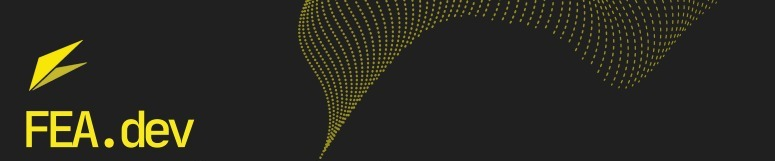


**1 - INTRODUÇÃO**

Taylor Swift, nascida em 13 de dezembro de 1989, é uma cantora e compositora americana renomada por sua voz distintiva, composições emotivas e amplo sucesso na indústria da música. A carreira de Swift começou desde cedo na música country, e ela rapidamente se destacou com seu álbum de estreia autointitulado, lançado em 2006.Ao longo dos anos, Taylor evoluiu como artista, transitando da música country para o pop com facilidade. Seus álbuns notáveis incluem "Fearless" (2008), "Speak Now" (2010), "Red" (2012), "1989" (2014), "Reputation" (2017), "Lover" (2019), "folklore" (2020), "evermore" (2020) e "Midnights" (2022). Cada álbum demonstra sua versatilidade e evolução musical. Taylor Swift, além de receber inúmeros prêmios, incluindo vários Grammy Awards, exerce uma influência significativa não apenas como cantora, mas também como ícone cultural.

Durante o código, você irá perceber quem alguns álbuns têm dois anos dentro dos parênteses - como é o caso do Fearless TV (2008:2021). E o que isso significa? O primeiro ano é sempre o ano do lançamento original, mas quando temos mais um ano a direita, isso que dizer que é quando a regrevação foi lançada, por isso todas as regravações possuem a sigla TV no final, que significa Taylor's Version. A regravação dos seis primeiros álbuns está acontecendo por conta da venda dos masters originais de Taylor Swift para a Big Machine Label Group, onde ela não teve a oportunidade de comprar os próprios masters. Posteriormente, esses masters foram adquiridos por Scooter Braun, empresário da indústria musical. Para recuperar a propriedade de suas músicas, Taylor  decidiu regravar seus álbuns. A ideia por trás de "Taylor's Version" é permitir que ela detenha os direitos sobre novas gravações das músicas que ela originalmente lançou em seus primeiros álbuns.

O propósito central deste projeto é conduzir uma análise das letras presentes em cada álbum de Taylor Swift, com uma ênfase específica nas referências a álcool. O intuito é investigar de que maneira esse tema se manifesta e se transforma ao longo da evolução musical da artista. Ao delinear a presença dessas referências de forma sistemática, desejo identificar padrões e mudanças nas abordagens líricas de Taylor Swift em relação ao tema do álcool, contribuindo assim para uma compreensão mais abrangente das narrativas e da evolução artística da cantora estadunidense.

**2 - DADOS**

In [169]:
#importando as bibliotecas
import fitz
import re

#função que extrai texto de um arquivo pdf
def extrair_texto_pdf(caminho_pdf):
    texto = ""
    with fitz.open(caminho_pdf) as doc:
        for pagina_num in range(doc.page_count):
            pagina = doc[pagina_num]
            texto += pagina.get_text()
    return texto

#função para contar ocorrências exatas de uma palavra em um texto, ou seja, quando falamos a palavra 'bar', palavras como bargain são desconsideradas
def contar_ocorrencias_exatas(texto, palavra):
    ocorrencias = re.findall(rf'\b{re.escape(palavra)}\b', texto, flags=re.IGNORECASE)
    return len(ocorrencias)

#caminhos para os arquivos pdf dos álbuns
caminho_albuns = [
    "/Users/anakarolina/POLI USP/FEADEV/PROJETO FINAL/Debut (2006).pdf",
    "/Users/anakarolina/POLI USP/FEADEV/PROJETO FINAL/Fearless TV (2008:2021).pdf",
    "/Users/anakarolina/POLI USP/FEADEV/PROJETO FINAL/Speak Now TV (2010:2023).pdf",
    "/Users/anakarolina/POLI USP/FEADEV/PROJETO FINAL/Red TV (2012:2021).pdf",
    "/Users/anakarolina/POLI USP/FEADEV/PROJETO FINAL/1989 TV (2014:2023).pdf",
    "/Users/anakarolina/POLI USP/FEADEV/PROJETO FINAL/reputation (2017).pdf",
    "/Users/anakarolina/POLI USP/FEADEV/PROJETO FINAL/Lover (2019).pdf",
    "/Users/anakarolina/POLI USP/FEADEV/PROJETO FINAL/folklore (2020).pdf",
    "/Users/anakarolina/POLI USP/FEADEV/PROJETO FINAL/evermore (2020).pdf",
    "/Users/anakarolina/POLI USP/FEADEV/PROJETO FINAL/Midnights (2022).pdf"
]

#lista que armazena o texto extraído de cada álbum
letra_dos_albuns = []

#extraindo o texto de cada PDF e armazenando na lista
for caminho_album in caminho_albuns:
    texto_album = extrair_texto_pdf(caminho_album)
    letra_dos_albuns.append(texto_album)

#caminho para o arquivo pdf contendo palavras relacionadas a álcool
dicionario_alcool = "/Users/anakarolina/POLI USP/FEADEV/PROJETO FINAL/Alcohol_words.pdf"

#extraindo o texto do dicionario das referencias a alcool
texto_dicionario_alcool = extrair_texto_pdf(dicionario_alcool)

#removendo palavras específicas como old e fashioned, pois o que deve ser considerado é 'old fashioned'
palavras_dicionario_alcool = texto_dicionario_alcool.split()
palavras_dicionario_alcool = [palavra for palavra in palavras_dicionario_alcool if palavra.lower() not in
                              ["old", "fashioned", "dom", "pérignon"]]

#dicionário para armazenar contagem de palavras por álbum
contagem_palavras_por_album = {
    palavra: [contar_ocorrencias_exatas(texto, palavra) for texto in letra_dos_albuns] for palavra in palavras_dicionario_alcool
}

#lista de expressões compostas
expressoes_compostas = ["dom pérignon", "old fashioned"]

#dicionário para armazenar contagem de expressões compostas por álbum
expressoes_compostas_album = {}

#contando ocorrências de expressões compostas para cada álbum
for expressao_composta in expressoes_compostas:
    contagem_por_album = {caminho_album: contar_ocorrencias_exatas(texto, expressao_composta) for caminho_album, texto in zip(caminho_albuns, letra_dos_albuns)}
    expressoes_compostas_album[expressao_composta] = list(contagem_por_album.values())

#adicionando contagens de expressões compostas ao dicionário principal
for expressao_composta, lista_contagens in expressoes_compostas_album.items():
    contagem_palavras_por_album[expressao_composta] = lista_contagens

**3 - RESULTADOS**

Encontrando a quantidade total de vezes que cada palavra do dicionário aparece em cada álbum:

In [170]:
for palavra, contagens in contagem_palavras_por_album.items():
    print(f"{palavra} - {contagens}")

wine - [0, 0, 0, 0, 1, 1, 3, 3, 3, 5]
champagne - [0, 0, 0, 0, 0, 1, 0, 1, 8, 3]
rosé - [0, 0, 0, 0, 0, 0, 0, 1, 0, 1]
bottles - [0, 0, 0, 0, 0, 3, 1, 0, 0, 0]
beer - [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
beers - [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
merlot - [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
drunk - [0, 0, 1, 0, 7, 2, 6, 3, 0, 0]
liquor - [0, 0, 0, 0, 0, 1, 0, 0, 0, 1]
whiskey - [0, 0, 0, 0, 0, 0, 1, 1, 0, 0]
whisky - [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
patron - [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
bar - [0, 0, 1, 0, 0, 3, 3, 1, 1, 2]
drink - [0, 0, 0, 3, 0, 3, 0, 0, 1, 2]
toast - [0, 0, 0, 0, 1, 3, 1, 0, 0, 0]
pub - [0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
island - [0, 0, 0, 0, 0, 4, 1, 1, 3, 0]
breeze - [0, 0, 0, 0, 0, 3, 0, 0, 0, 3]
bars - [0, 1, 0, 0, 0, 0, 0, 1, 0, 0]
bottle - [0, 0, 0, 0, 0, 0, 0, 3, 1, 0]
dom pérignon - [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
old fashioned - [0, 0, 0, 0, 0, 2, 0, 0, 0, 0]


Somando o total das ocorrências de todas as palavras ou expressões compostas em cada álbum:

In [171]:
soma_por_album = [sum(contagem) for contagem in zip(*contagem_palavras_por_album.values())]

print (soma_por_album)

[0, 1, 2, 3, 9, 28, 17, 15, 20, 17]


Criando o gráfico final:

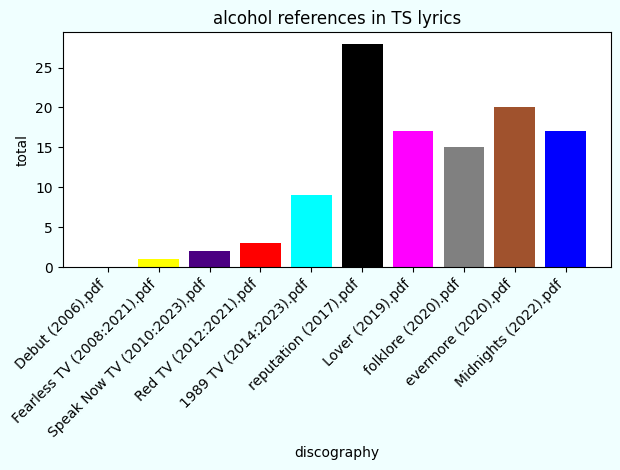

In [172]:
#importando as bibliotecas
import matplotlib.pyplot as plt
import os

#tirando os caminhos e obtendo os nomes dos álbuns
nomes_albuns = [os.path.basename(caminho) for caminho in caminho_albuns]

#alterando cor de cada barra, onde cada cor corresponde a cor do respectivo álbum
cores_por_album = ['green', 'yellow', 'indigo', 'red', 'cyan', 'black', 'magenta', 'gray', 'sienna', 'blue']

#criando um gráfico de barras
plt.bar(nomes_albuns, soma_por_album, color=cores_por_album)

#propriedades do gráfico
plt.gcf().set_facecolor('azure')
plt.xlabel('discography')
plt.ylabel('total')
plt.title('alcohol references in TS lyrics')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**4 - CONCLUSÃO**

Com base no gráfico e nas listas obtidas, podemos tirar algumas conclusões:

**Conclusão 1:** Os álbuns iniciais, como "Debut (2006)" e "Fearless TV (2008:2021)", têm poucas referências a álcool, com 0 e 1 no total, respectivamente. Isso provavelmente se deve principalmente por conta da idade da artista na época.

**Conclusão 2:** A soma total aumenta notavelmente nos álbuns "1989 TV (2014:2023)" e "reputation (2017)", atingindo o pico de 28 referências em "reputation".

**Conclusão 3:** Álbuns mais recentes, como "Lover (2019)" e "Midnights (2022)", mantêm uma quantidade significativa de referências a álcool, mas não atingem os picos observados em "1989 TV" e "reputation".

**Conclusão 4:** As palavras que mais se repetem são wine, champagne e drunk.
